# Transaction fraud detection

In [1]:
import numpy as np
import pandas as pd

## PRE-PROCESSING

## 1. Data cleaning including missing values, outliers and multi-collinearity. 

#### WRANGLING

In [2]:
# Read the data
import time

file_path = r"C:\Users\parul\Downloads\Fraud.csv"

start = time.time()
# Initialize an empty DataFrame to store the concatenated chunks
df = pd.DataFrame()

# Read data in chunks of 1 million rows at a time and concatenate them
for chunk in pd.read_csv(file_path, chunksize=1000000):
    df = pd.concat([df, chunk])

end = time.time()

print("Read csv with chunks: ", (end - start), "sec")

# Shape the data
df.shape

Read csv with chunks:  13.502328872680664 sec


(6362620, 11)

In [3]:
# Get head of the data
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


#### ANALYSIS

In [5]:
# Check for null values
df.isnull().values.any()

False

In [6]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


This is a really big dataset with no NULL values having size over 500MB. This would take some time to train for a normal GPU.

In [7]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


These results prove that this is a highly unbalanced data as Percentage of Legit transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %. 
SO DECISION TREES AND RANDOM FORESTS ARE GOOD METHODS FOR IMBALANCED DATA.

## VISUALISATION

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#### CORRELATION HEATMAP

<AxesSubplot:>

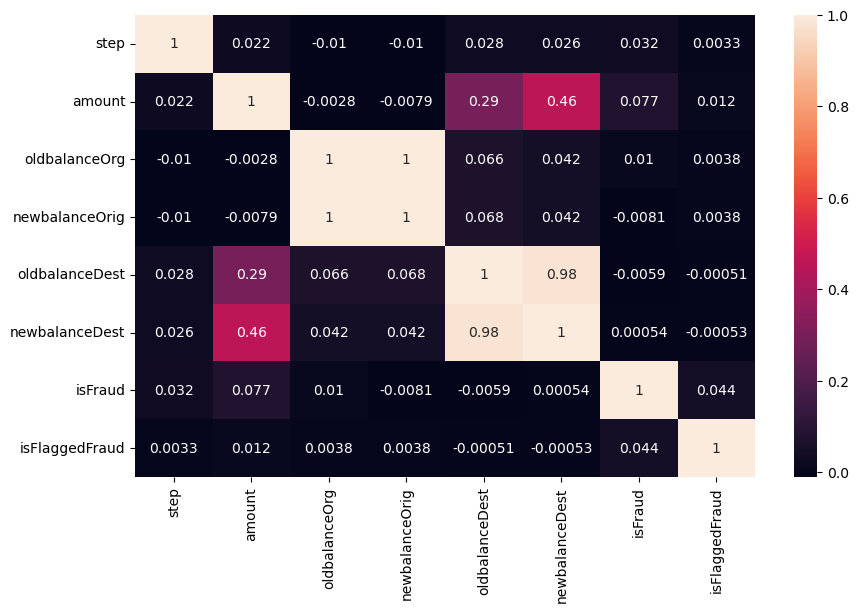

In [9]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

#### NUMBER OF LEGIT AND FRAUD TRANSACTIONS

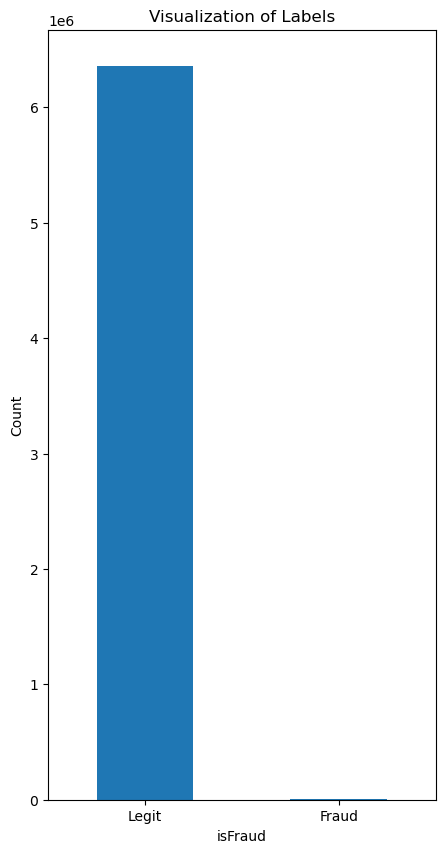

In [10]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

## PROBLEM SOLVING

In [11]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### LABEL ENCODING

In [12]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

In [13]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [14]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


#### MULTICOLINEARITY

In [15]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

In [16]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<AxesSubplot:>

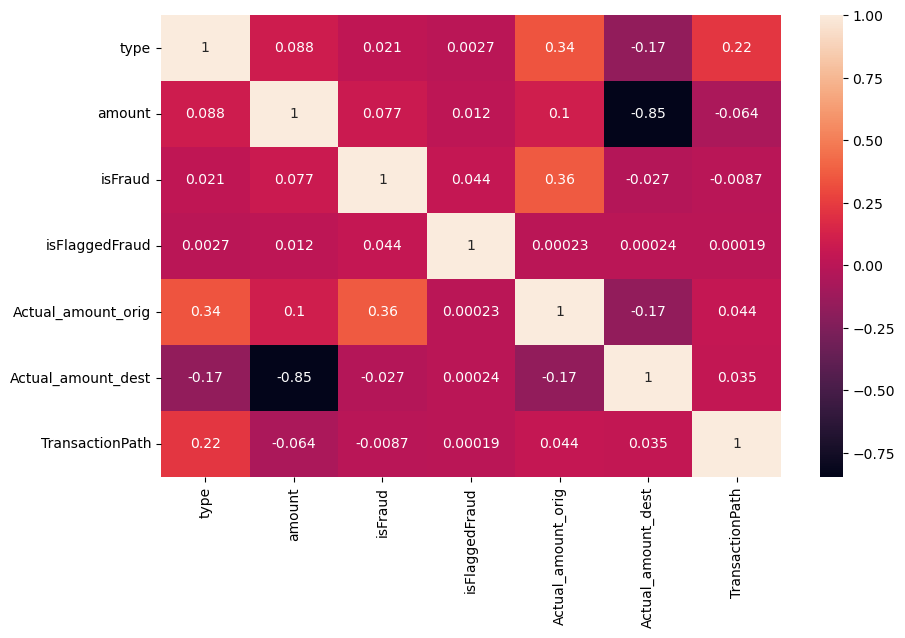

In [17]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

## 2. Describe your fraud detection model in elaboration.

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.

This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.

Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.

Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

Using Random Forest for a classification problem, especially with a large dataset, offers several advantages that make it a popular choice among machine learning algorithms. Here are some of the reasons why Random Forest is well-suited for handling classification problems with large datasets:

1. **Parallel Processing:** Random Forest can be parallelized easily, allowing it to take advantage of multi-core processors. This parallel processing capability accelerates the training process, making it efficient for large datasets.

2. **Scalability:** Random Forest can handle large datasets with a high number of observations and features. It does not suffer from performance degradation as the dataset size increases, which can be an issue for some other algorithms.

3. **Reduced Overfitting:** Random Forest builds multiple decision trees (the "forest") and aggregates their predictions. This ensemble approach helps reduce overfitting, which is particularly beneficial when dealing with large datasets that may have noisy or redundant features.

4. **Feature Importance:** Random Forest provides a feature importance ranking, which is valuable for understanding which features have the most influence on the classification. This information can help with feature selection and feature engineering in large datasets.

5. **Handling Imbalanced Data:** In cases where the dataset has imbalanced classes (e.g., in our case there is a much larger number of non-fraudulent transactions compared to fraudulent ones), Random Forest can handle class imbalances effectively by giving balanced consideration to both classes during tree construction.

6. **Robust to Outliers:** Random Forest is robust to outliers in the data, as the ensemble nature of the model mitigates the impact of extreme values in individual trees.

7. **Non-Linearity:** Random Forest can capture complex, non-linear relationships between features and the target variable. This makes it suitable for a wide range of classification problems where the decision boundaries are not linear.

8. **Implicit Feature Selection:** Random Forest can perform implicit feature selection by ranking the importance of features based on their contribution to the model's accuracy. This can help identify the most relevant features in large datasets.

9. **Out-of-Bag (OOB) Evaluation:** Random Forest provides an OOB evaluation method, which is useful for estimating the model's performance without the need for a separate validation dataset. This is convenient when working with large datasets where splitting data into multiple sets for validation can be challenging.

10. **Robustness to Noisy Data:** Random Forest is less sensitive to noisy data points, missing values, or minor data preprocessing issues, making it a robust choice for real-world, imperfect datasets.

11. **Tuning Flexibility:** Random Forest offers parameters that can be tuned to control the size of the ensemble (number of trees) and the depth of individual trees, allowing you to optimize performance based on the dataset's characteristics.

## 3. How did you select variables to be included in the model?
Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

## MODEL BUILDING

## 4. Demonstrate the performance of the model using the best set of tools.

To demonstrate the performance of the fraud detection model, we'll use a set of common tools and metrics for evaluating binary classification models. Here's how we can assess and showcase the model's performance:

**1. Data Splitting:**
   - Split the dataset into two subsets: a training set and a validation set. We will use 70% for training and 30% for validation.

**2. Model Training:**
   - We will train the fraud detection model on the training data.

**3. Model Evaluation:**
   - We will evaluate the model's performance on the validation set using the following key metrics:

   - **Precision:** Precision measures the proportion of true positive predictions (correctly identified fraudulent transactions) out of all positive predictions (transactions classified as fraudulent). A higher precision indicates fewer false positives.
   
   - **Recall:** Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive cases (all fraudulent transactions). A higher recall indicates a better ability to detect actual fraudulent transactions.
   
   - **F1-Score:** The F1-Score is the harmonic mean of precision and recall. It provides a balanced measure of the model's overall performance in terms of both false positives and false negatives.
   
   - **ROC AUC (Receiver Operating Characteristic Area Under the Curve):** ROC AUC is a curve that measures the trade-off between true positive rate (recall) and false positive rate at different thresholds. A higher ROC AUC indicates better discrimination between fraudulent and non-fraudulent transactions.

**4. Confusion Matrix:**
   - We will display a confusion matrix that shows the model's performance in terms of true positives, true negatives, false positives, and false negatives. This matrix provides a detailed breakdown of the model's classification results.

**5. Receiver Operating Characteristic (ROC) Curve:**
   - We will plot an ROC curve to visualize the model's performance across various threshold settings. The curve shows the trade-off between true positive rate and false positive rate.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [19]:
print(new_df.columns)

Index(['type', 'amount', 'isFraud', 'isFlaggedFraud', 'Actual_amount_orig',
       'Actual_amount_dest', 'TransactionPath'],
      dtype='object')


#### NORMALIZING (SCALING) AMOUNT

In [20]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

I did not normalize the complete dataset because it may lead to decrease in accuracy of model.

#### TRAIN-TEST SPLIT

In [21]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


#### MODEL TRAINIG

In [22]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [23]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

#### EVALUATION

In [24]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.92293531071581
Random Forest Score:  99.95866482675376


In [25]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1718
False Positives: 754
True Negatives: 1905597
False Negatives: 717
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1709
False Positives: 63
True Negatives: 1906288
False Negatives: 726


<br>TP(Decision Tree) ~ TP(Random Forest) so no competetion here.
<br>FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge
<br>TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too
<br>FN(Decision Tree) ~ FN(Random Forest)

<br> Here Random Forest looks good.

In [26]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905597     754]
 [    717    1718]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906288      63]
 [    726    1709]]


In [27]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.69      0.71      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



With Such a good precision and hence F1-Score, Random Forest comes out to be better as expected.

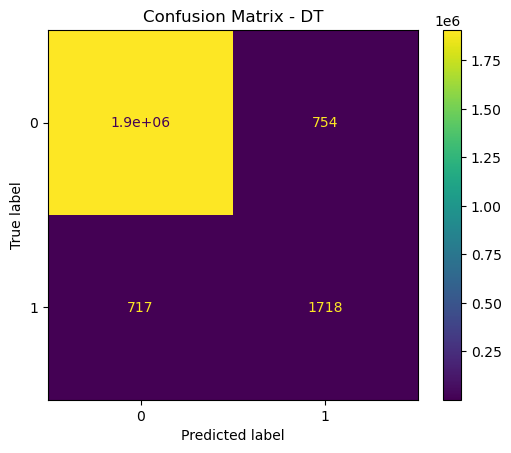

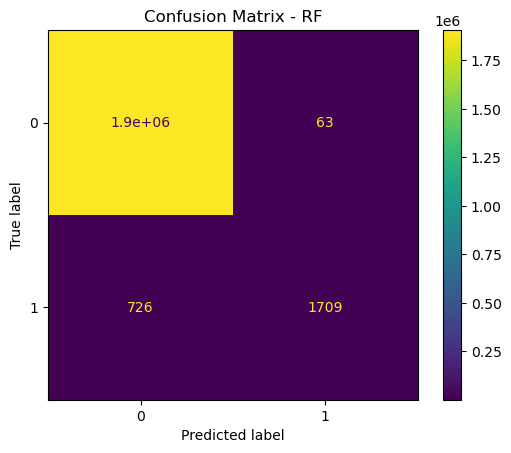

In [28]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

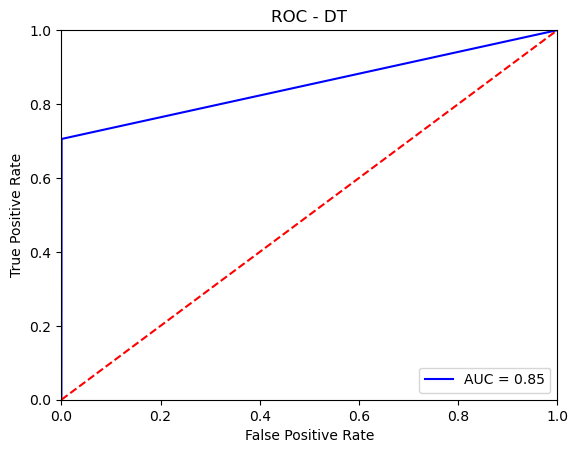

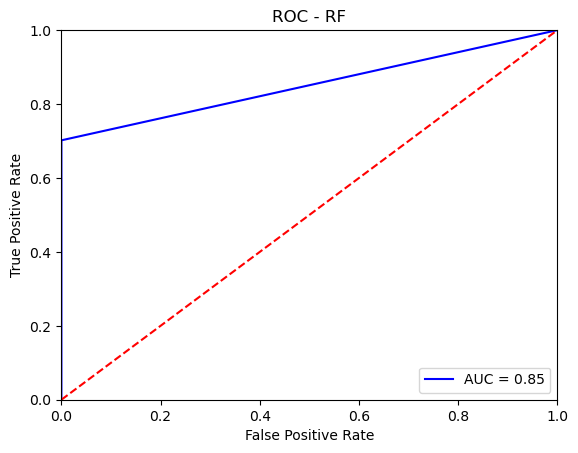

In [29]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.

## CONCLUSION

## 5. What are the key factors that predict fraudulent customer?

Here are some of the key factors that commonly contribute to predicting fraudulent transactions:

1. **Transaction Type ('type'):** Certain transaction types are more commonly associated with fraud. For example, 'TRANSFER' and 'CASH_OUT' transactions often have a higher likelihood of being fraudulent compared to 'PAYMENT' or 'DEBIT' transactions.

2. **Transaction Amount ('amount'):** Unusually large or small transaction amounts may be indicative of fraudulent activity. Fraudsters may attempt to move large sums quickly or perform small test transactions.

3. **Account Balances ('oldbalanceOrg' and 'newbalanceOrig'):** Changes in account balances before and after a transaction can be significant indicators. For instance, if a transaction results in a drastic reduction of the sender's balance ('oldbalanceOrg' minus 'newbalanceOrig'), it may raise suspicion.

4. **Recipient's Account Balances ('oldbalanceDest' and 'newbalanceDest'):** Similarly, changes in the recipient's account balances before and after a transaction can be relevant. For instance, if the recipient's balance increases significantly after a transaction ('newbalanceDest' minus 'oldbalanceDest'), it may suggest suspicious behavior.

5. **Transaction Frequency:** Frequent transactions within a short time frame, especially for high amounts, might indicate fraudulent behavior. Fraudsters often engage in rapid transactions to empty an account before detection.

6. **Flagging Variables ('isFlaggedFraud'):** If a transaction is flagged as potential fraud by the business's monitoring system ('isFlaggedFraud' is set to 1), it's a strong indicator of suspicious activity.

7. **Network Analysis:** Analyzing transaction networks and patterns can reveal fraudulent behavior. For example, identifying clusters of connected accounts involved in suspicious transactions can be valuable.

8. **Geographic Anomalies:** Unusual geographic locations for transactions or a high volume of international transactions may raise suspicions.

9. **Time of Day:** The timing of transactions can also be a factor. Suspicious activity might occur during non-business hours or on weekends.

10. **Behavioral Patterns:** Detecting deviations from a customer's typical transaction behavior, such as suddenly sending large sums or changing transaction patterns, can be indicative of fraud.

## 6. Do these factors make sense? If yes, How? If not, How not?

Yes, the factors mentioned in the previous response do make sense in the context of predicting fraudulent transactions. Here's why each of these factors is relevant:

1. **Transaction Type ('type'):** Transaction type is a logical factor because different types of transactions have varying levels of inherent risk. For instance, 'TRANSFER' and 'CASH_OUT' transactions are more likely to involve fraudulent activity due to the movement of funds.

2. **Transaction Amount ('amount'):** Transaction amount is crucial because unusually large or small transactions can be indicative of fraudulent behavior. Fraudsters may attempt to move significant sums or perform small test transactions before larger fraudulent actions.

3. **Account Balances ('oldbalanceOrg' and 'newbalanceOrig'):** Changes in account balances are relevant because significant reductions in the sender's balance ('oldbalanceOrg' minus 'newbalanceOrig') after a transaction may suggest suspicious activity.

4. **Recipient's Account Balances ('oldbalanceDest' and 'newbalanceDest'):** Similar to sender balances, changes in recipient account balances can indicate unusual activity, especially if the recipient's balance increases significantly after a transaction.

5. **Transaction Frequency:** Frequent and rapid transactions can be indicative of fraud. Fraudsters may attempt to quickly empty an account before detection.

6. **Flagging Variables ('isFlaggedFraud'):** Transactions flagged as potential fraud by the monitoring system are highly relevant indicators of suspicious behavior.

7. **Network Analysis:** Analyzing transaction networks and patterns is a sophisticated approach to identifying fraud, as it can uncover hidden connections and clusters of suspicious accounts.

8. **Geographic Anomalies:** Unusual geographic locations for transactions can be relevant, as fraudulent activity might involve international transfers or transactions from unexpected locations.

9. **Time of Day:** The timing of transactions can be important, as some fraudulent activity might occur during non-business hours or at times when there is less monitoring.

10. **Behavioral Patterns:** Detecting deviations from a customer's typical behavior is crucial because fraudsters often exhibit inconsistent or unusual transaction patterns.

## 7. What kind of prevention should be adopted while company update its infrastructure?

When a company is updating its infrastructure to enhance fraud prevention, it should consider a multi-faceted approach that combines technological, procedural, and organizational measures. Here are several prevention strategies to adopt during the infrastructure update:

1. **Advanced Monitoring Systems:**
   - Implement advanced monitoring systems that continuously analyze transactions in real-time, looking for anomalies and suspicious patterns based on the key factors mentioned earlier, such as transaction type, amount, account balances, and frequency.

2. **Machine Learning Models:**
   - Develop and deploy machine learning models, such as the fraud detection model discussed earlier, to automatically identify potentially fraudulent transactions. These models can adapt to changing fraud patterns and provide real-time alerts.

3. **Enhanced Authentication and Authorization:**
   - Strengthen user authentication and authorization processes to ensure that only authorized individuals have access to sensitive financial data. Multi-factor authentication (MFA) and biometric authentication can add an extra layer of security.

4. **Behavioral Analysis:**
   - Implement behavioral analysis systems that monitor user behavior over time to detect deviations from typical patterns. For example, flagging users who suddenly engage in unusual or high-risk transactions.

5. **Transaction Limits:**
   - Set transaction limits and velocity limits for users and accounts. Transactions exceeding these limits can trigger additional scrutiny or require manual approval.

6. **Geographic Filters:**
   - Use geographic filters to block or flag transactions from high-risk or unusual locations. This can help prevent fraudulent international transfers.

7. **Alert Systems:**
   - Establish real-time alert systems that notify security teams or analysts of potential fraud attempts. Alerts should be generated for transactions that meet specific risk criteria.

8. **Employee Training:**
   - Train employees, especially those involved in fraud detection and customer support, to recognize and report potential fraud indicators. Staff should be aware of the key factors that predict fraudulent transactions.

9. **Regulatory Compliance:**
   - Ensure that all preventive measures comply with relevant regulatory requirements, such as GDPR or data protection laws. This includes data handling, customer notifications, and record-keeping.

10. **Data Sharing and Collaboration:**
    - Collaborate with other financial institutions and industry stakeholders to share fraud intelligence and information about emerging threats. Shared databases can help detect fraud patterns across a wider network.

11. **Continuous Improvement:**
    - Establish a culture of continuous improvement in fraud prevention. Regularly review and update the prevention strategies and infrastructure to adapt to evolving fraud tactics.

12. **Customer Education:**
    - Educate customers about common fraud risks and prevention measures. Encourage them to monitor their accounts and report any suspicious activity promptly.

13. **Penetration Testing:**
    - Conduct regular penetration testing and security audits to identify vulnerabilities and ensure that security measures are effective.

14. **Incident Response Plan:**
    - Develop a comprehensive incident response plan that outlines steps to take in the event of a security breach or suspected fraud. Ensure that all employees are aware of the plan and their roles in responding to incidents.

15. **Data Encryption:**
    - Use strong encryption protocols to protect sensitive customer data both in transit and at rest.

16. **Vendor Assessment:**
    - Assess the security practices of third-party vendors and service providers to ensure they adhere to high-security standards, especially if they have access to sensitive financial data.

## 8. Assuming these actions have been implemented, how would you determine if they work?

Assessing the effectiveness of the implemented fraud prevention measures is crucial to ensuring that they are working as intended and providing the desired level of protection. Here's how we can determine if the actions taken to prevent fraud are effective:

1. **Key Performance Indicators (KPIs):** Define specific KPIs and metrics that align with the goals of the fraud prevention measures. These metrics can include:

   - **Reduction in Fraud Incidents:** Track the number and severity of fraudulent incidents over time. A decrease in the frequency and impact of fraud incidents is a positive sign.

   - **False Positives:** Monitor the rate of false positives (legitimate transactions incorrectly flagged as fraudulent) to ensure it remains at an acceptable level. Too many false positives can be disruptive to legitimate customers.

   - **Detection Rate:** Measure the percentage of actual fraudulent transactions detected by the prevention measures. A higher detection rate indicates the effectiveness of the system.

   - **Response Time:** Assess the time it takes to respond to and mitigate potential fraud incidents. Faster response times can reduce losses.

   - **Customer Feedback:** Collect feedback from customers regarding their experiences with security measures and fraud detection. Customer satisfaction is an essential indicator.

2. **Comparative Analysis:** Compare historical data (before the implementation of the prevention measures) with current data to identify changes in fraud patterns and incident rates. If the prevention measures are effective, you should see a reduction in fraud incidents.

3. **Model Performance Evaluation:** If machine learning models are part of the prevention measures, regularly evaluate their performance. This includes assessing precision, recall, F1-score, and ROC AUC. Models should continue to improve in their ability to detect fraud over time.

4. **Red Team Testing:** Conduct red team testing or penetration testing to simulate real-world attacks and assess the resilience of the prevention measures. This can help identify vulnerabilities and weaknesses that need attention.

5. **Incident Reporting and Analysis:** Encourage employees to report potential fraud incidents or security concerns promptly. Analyze reported incidents to understand the effectiveness of the response and whether any gaps exist.

6. **Audits and Compliance Checks:** Regularly conduct internal audits and compliance checks to ensure that the prevention measures are aligned with regulatory requirements and industry standards.

7. **Continuous Improvement:** Establish a process for continuous improvement. Regularly review and update prevention measures based on lessons learned, new fraud tactics, and changes in the business environment.

8. **Benchmarking:** Compare the organization's fraud prevention performance to industry benchmarks and best practices. Benchmarking can help identify areas for improvement.

9. **User Training and Awareness:** Evaluate the effectiveness of user training and awareness programs by assessing user behavior and adherence to security protocols.

10. **Feedback from Fraud Analysts:** Seek feedback from fraud analysts and investigators who work with the prevention measures. Their insights can provide valuable information about the strengths and weaknesses of the system.

11. **Cost-Benefit Analysis:** Assess the cost-effectiveness of the prevention measures by comparing the costs of implementation and maintenance to the financial losses prevented or reduced due to fraud.